In [1]:
import pandas as pd
import numpy as np


#DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df_1 = pd.read_csv("speed_price_att.csv")
df_2 = pd.read_csv("speed_price_att_other_cities.csv")
df_3 = pd.read_csv("speed_price_centurylink.csv")
df_4 = pd.read_csv("speed_price_earthlink.csv")
df_5 = pd.read_csv("speed_price_verizon.csv")

In [3]:
df = pd.concat([df_1, df_2, df_3,df_4,df_5], ignore_index=True, axis = 0)

In [4]:
df.shape

(1500880, 34)

In [5]:
df.head()

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,redlining_grade,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,availability_status,geoid,closest_fiber_miles,address_full_closest_fiber,lat_closest_fiber,lon_closest_fiber,contract_provider,in_service
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,NaN,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

address_full                         0
incorporated_place                   0
major_city                           0
state                                0
lat                                  0
lon                                  0
block_group                          0
collection_datetime                  0
provider                             0
speed_down                           0
speed_up                             0
speed_unit                      306885
price                           313429
technology                      313429
package                         313426
fastest_speed_down                   0
fastest_speed_price                  0
fn                                   0
redlining_grade                 802373
race_perc_non_white                  0
income_lmi                       95352
ppl_per_sq_mile                  50346
n_providers                      50342
income_dollars_below_median      95352
internet_perc_broadband           2566
median_household_income  

We shall drop these columns

In [7]:
drops = ["availability_status", "geoid", "closest_fiber_miles", "address_full_closest_fiber" , "lat_closest_fiber", "lon_closest_fiber", "contract_provider", "in_service", "redlining_grade"]

In [8]:
df.drop(drops, axis = 1, inplace  = True)

In [9]:
df.isna().sum()

address_full                        0
incorporated_place                  0
major_city                          0
state                               0
lat                                 0
lon                                 0
block_group                         0
collection_datetime                 0
provider                            0
speed_down                          0
speed_up                            0
speed_unit                     306885
price                          313429
technology                     313429
package                        313426
fastest_speed_down                  0
fastest_speed_price                 0
fn                                  0
race_perc_non_white                 0
income_lmi                      95352
ppl_per_sq_mile                 50346
n_providers                     50342
income_dollars_below_median     95352
internet_perc_broadband          2566
median_household_income             0
dtype: int64

Let us tackle the remaining features with missing data and fill them accordingly.

**Speed Unit**

The speed unit is same for all Mbps

In [10]:
values = {"speed_unit": 'Mbps'}
df.fillna(value = values , inplace = True)

**Price**

The cheapest price is the same for each internet provider regardless of the region and internet speed available. 
So we can impute accordingly.

In [11]:
df.groupby("provider")['price'].median()

provider
AT&T           55.00
CenturyLink    50.00
EarthLink      59.95
Verizon        39.99
Name: price, dtype: float64

In [12]:
#df['price'] = df['price'].fillna(df.groupby('provider')['price'].transform('median'))

In [13]:
df[df['price'].isna() == True].head(5)

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
12,"2012 Poole Dr NW, Huntsville AL 35810",Huntsville city,huntsville,AL,34.761949,-86.593536,1.089001e+10,1650310213,AT&T,0.0,0.0,Mbps,NaN,NaN,NaN,0.0,0.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.090070,4.0,35091.0,0.527881,21667
16,"2902 Pike Ave NW, Huntsville AL 35810",Huntsville city,huntsville,AL,34.761237,-86.592661,1.089001e+10,1650310193,AT&T,0.0,0.0,Mbps,NaN,NaN,NaN,0.0,0.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.090070,4.0,35091.0,0.527881,21667
18,"2047 Max Luther Dr NW, Huntsville AL 35810",Huntsville city,huntsville,AL,34.757689,-86.595780,1.089001e+10,1650310195,AT&T,0.0,0.0,Mbps,NaN,NaN,NaN,0.0,0.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.090070,4.0,35091.0,0.527881,21667
19,"6230 Karen Davie Dr NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.714748,-86.659798,1.089001e+10,1650315634,AT&T,0.0,0.0,Mbps,NaN,NaN,NaN,0.0,0.0,../data/intermediary/isp/att/huntsville/010890...,0.360934,0.787343,1814.993931,4.0,12070.0,0.892045,44688
22,"6337 Karen Davie Dr NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.715606,-86.659726,1.089001e+10,1650315643,AT&T,0.0,0.0,Mbps,NaN,NaN,NaN,0.0,0.0,../data/intermediary/isp/att/huntsville/010890...,0.360934,0.787343,1814.993931,4.0,12070.0,0.892045,44688


We see that the rows that does not have the price also has missing technology and package and internet speed (download and upload). there are 313,429 of these missing rows.
We could have done a forward fill imputation for the missing data which would perfectly for the missing price. But regarding the download and upload speed it varies alot from 0.768 Mbps to 300 Mbps and without geographical context it is safer to not assume that forward or backward fill would solve this issue.
As we have 1.5 million datapoints, we can safely drop these missing rows.


In [14]:
df.dropna(subset=['price','technology','package'], inplace = True)

In [15]:
df.isna().sum()

address_full                       0
incorporated_place                 0
major_city                         0
state                              0
lat                                0
lon                                0
block_group                        0
collection_datetime                0
provider                           0
speed_down                         0
speed_up                           0
speed_unit                         0
price                              0
technology                         0
package                            0
fastest_speed_down                 0
fastest_speed_price                0
fn                                 0
race_perc_non_white                0
income_lmi                     71157
ppl_per_sq_mile                39976
n_providers                    39966
income_dollars_below_median    71157
internet_perc_broadband         1362
median_household_income            0
dtype: int64

In [16]:
df.shape

(1187451, 25)

**internet_perc_broadband**

In [17]:
df.head()

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667


In [18]:
df.dropna(subset = ['internet_perc_broadband'], inplace = True)

**Income LMI**

The income lmi is the median_household_income divided by the city median household income (sourced from U.S. Census Bureau).

We could fill up the missing Income LMI by using forward fill, but to be more accurate we should group up the data in such a way that the similar income households can be clustured together. 

Let us see which has the strongest correlation with income lmi:

<AxesSubplot:>

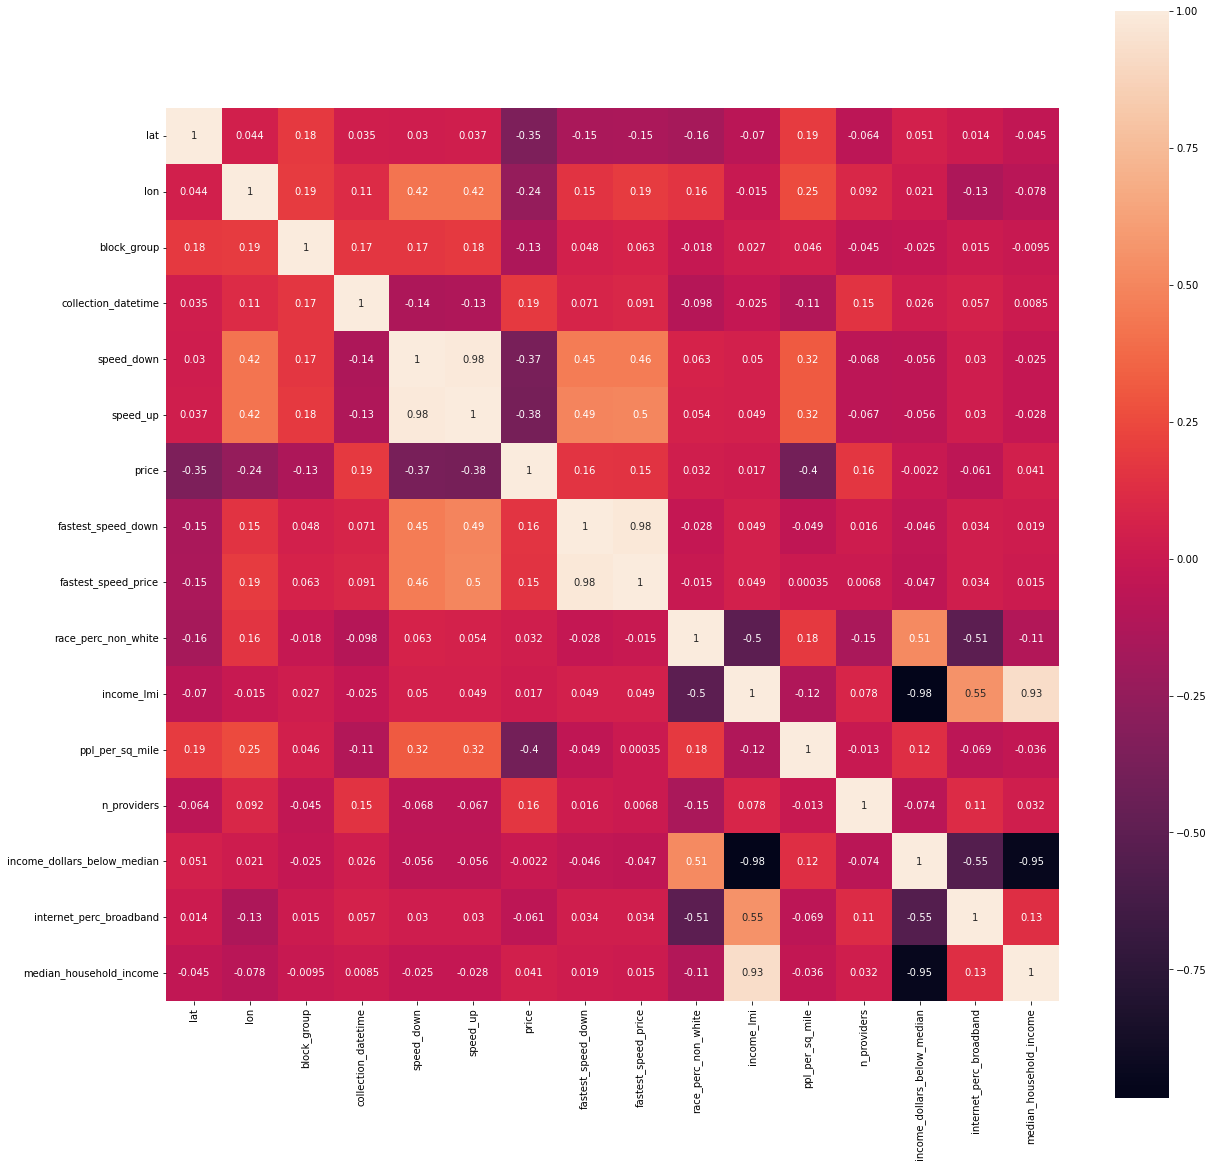

In [19]:
correlation = df.corr()
fig = plt.figure(figsize = (20,20))
sns.heatmap(correlation, square = True, annot=True)

Median income household (positively) and income dollars below median (negatively) are strongly correlated with the income lmi but unfortunately the data rows where income lmo are missing, the income household and income dollars below median are also missing.
internet_perc_broadband is a good candidate for grouping as it has strong correlation and few missing values.
Let us look further:


<AxesSubplot:xlabel='internet_perc_broadband', ylabel='income_lmi'>

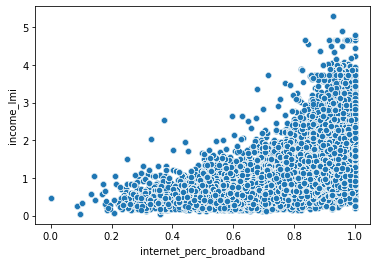

In [20]:
sns.scatterplot(data= df, x = 'internet_perc_broadband', y = 'income_lmi')

the two distribution plots below show why we get a scatterplot such as above, most data is centered around 1 for income_lmi and 0.8-1.0 for internet_perc_broadband.

In [21]:
df.dtypes

address_full                    object
incorporated_place              object
major_city                      object
state                           object
lat                            float64
lon                            float64
block_group                    float64
collection_datetime              int64
provider                        object
speed_down                     float64
speed_up                       float64
speed_unit                      object
price                          float64
technology                      object
package                         object
fastest_speed_down             float64
fastest_speed_price            float64
fn                              object
race_perc_non_white            float64
income_lmi                     float64
ppl_per_sq_mile                float64
n_providers                    float64
income_dollars_below_median    float64
internet_perc_broadband        float64
median_household_income          int64
dtype: object

<AxesSubplot:xlabel='block_group', ylabel='income_lmi'>

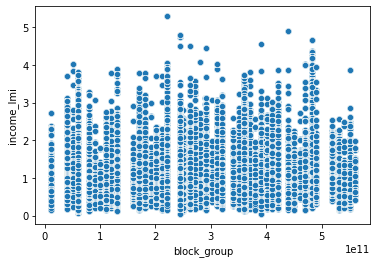

In [22]:

sns.scatterplot(data= df, x = 'block_group', y = 'income_lmi')

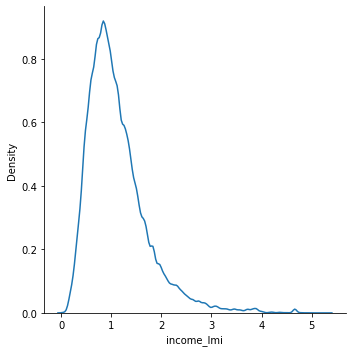

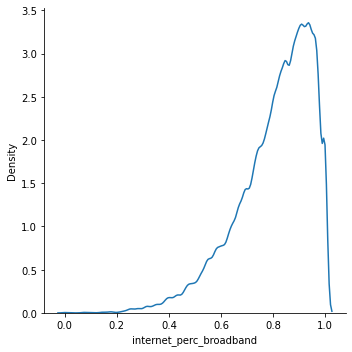

In [23]:
sns.displot(data = df, x = 'income_lmi', kind='kde')
sns.displot(data = df, x = 'internet_perc_broadband', kind='kde')

As per the scatterplot, we can see that for increasing internet_perc_broadband the range of income_lmi is greater, this is because the income lmi is based on the median income household in that city, so most households will have the income closer to the median which results in a income_lmi closer to 1. 

For the internet_perc_broadband, if a bigger percentage of the population has internet then the variety of households will also be greater, hence we see more a bigger range of income lmi for an internet_perc_broadband of 1.0

In [24]:
df["internet_perc_broadband"].nunique()

28659

In [25]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 1.1]
names = ['10 percent','20 percent','30 percent','40 percent','50 percent','60 percent','70 percent','80 percent','90 percent','100 percent']

df["Broadband_percentage_pop"] = pd.cut(df["internet_perc_broadband"],bins,labels=names)

In [26]:
df.head()

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,Broadband_percentage_pop
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,60 percent
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,60 percent
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,60 percent
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,60 percent
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667,60 percent


In [27]:
df.dropna(subset = ['Broadband_percentage_pop'], inplace = True)

In [28]:
df['income_lmi'] = df['income_lmi'].fillna(df.groupby(["incorporated_place",'Broadband_percentage_pop'])['income_lmi'].transform(lambda x : x.ffill().bfill()))



In [29]:
df['income_lmi'] = df['income_lmi'].fillna(df.groupby("incorporated_place")['income_lmi'].transform(lambda x : x.ffill().bfill()))


In [30]:
df['income_lmi'].fillna('median', inplace =True)

In [31]:
df.isna().sum()

address_full                       0
incorporated_place                 0
major_city                         0
state                              0
lat                                0
lon                                0
block_group                        0
collection_datetime                0
provider                           0
speed_down                         0
speed_up                           0
speed_unit                         0
price                              0
technology                         0
package                            0
fastest_speed_down                 0
fastest_speed_price                0
fn                                 0
race_perc_non_white                0
income_lmi                         0
ppl_per_sq_mile                39839
n_providers                    39841
income_dollars_below_median    69699
internet_perc_broadband            0
median_household_income            0
Broadband_percentage_pop           0
dtype: int64

## Median Income Household

In [32]:
df_6 = df.copy()

In [33]:
df_6[df_6["median_household_income"] <= 0].count()

address_full                   44414
incorporated_place             44414
major_city                     44414
state                          44414
lat                            44414
lon                            44414
block_group                    44414
collection_datetime            44414
provider                       44414
speed_down                     44414
speed_up                       44414
speed_unit                     44414
price                          44414
technology                     44414
package                        44414
fastest_speed_down             44414
fastest_speed_price            44414
fn                             44414
race_perc_non_white            44414
income_lmi                     44414
ppl_per_sq_mile                42689
n_providers                    42689
income_dollars_below_median        0
internet_perc_broadband        44414
median_household_income        44414
Broadband_percentage_pop       44414
dtype: int64

In [34]:
df_6["median_household_income"] = df_6["median_household_income"].mask(df_6["median_household_income"] < 0, None)



In [35]:
df_6.iloc[1710,:]

address_full                               8432 Hogan Dr SE, Huntsville AL 35802
incorporated_place                                               Huntsville city
major_city                                                            huntsville
state                                                                         AL
lat                                                                    34.654148
lon                                                                   -86.562948
block_group                                                        10890027012.0
collection_datetime                                                   1650311647
provider                                                                    AT&T
speed_down                                                                   5.0
speed_up                                                                     1.0
speed_unit                                                                  Mbps
price                       

In [36]:
df_6[df_6["median_household_income"] <= 0]

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,Broadband_percentage_pop


In [37]:
df_6["median_household_income"] = np.where(df_6["median_household_income"] > 0, df_6["median_household_income"], None)

df_6["median_household_income"].fillna(np.nan,inplace = True)

In [38]:
df_6[df_6['address_full'] == '2521 Bronco Cir NW, Huntsville AL 35816']

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,Broadband_percentage_pop
1710,"2521 Bronco Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.755863,-86.643378,1.089011e+10,1650325038,AT&T,18.0,1.0,Mbps,55.0,Not Fiber,Internet 18,18.0,55.0,../data/intermediary/isp/att/huntsville/010890...,0.787011,0.378925,532.972114,5.0,NaN,0.695548,NaN,70 percent


In [39]:
df_6.isna().sum()

address_full                       0
incorporated_place                 0
major_city                         0
state                              0
lat                                0
lon                                0
block_group                        0
collection_datetime                0
provider                           0
speed_down                         0
speed_up                           0
speed_unit                         0
price                              0
technology                         0
package                            0
fastest_speed_down                 0
fastest_speed_price                0
fn                                 0
race_perc_non_white                0
income_lmi                         0
ppl_per_sq_mile                39839
n_providers                    39841
income_dollars_below_median    69699
internet_perc_broadband            0
median_household_income        44414
Broadband_percentage_pop           0
dtype: int64

In [40]:
df_6['median_household_income'].fillna(df_6.groupby("incorporated_place")['median_household_income'].transform('median'), inplace = True)


In [41]:
df.groupby("incorporated_place")['median_household_income'].median()  

incorporated_place
Albuquerque city                                         59034.0
Atlanta city                                             67829.0
Baltimore city                                           47708.0
Billings city                                            61889.0
Boise City city                                          60750.0
Boston city                                              74286.0
Bridgeport city                                          41212.0
Charleston city                                          72042.0
Charlotte city                                           63654.0
Cheyenne city                                            68710.0
Chicago city                                             56453.0
Cleveland city                                           30913.0
Columbus city                                            51000.0
Denver city                                              75065.0
Des Moines city                                          56563.0
Detroi

**PPL PER SQUARE MILES**

In [42]:
df_6['ppl_per_sq_mile'] = df_6['ppl_per_sq_mile'].fillna(df_6.groupby("incorporated_place")['ppl_per_sq_mile'].transform(lambda x : x.ffill().bfill()))

    

In [43]:
df_6['ppl_per_sq_mile'] = df_6['ppl_per_sq_mile'].fillna(method = 'ffill')

**N_PROVIDERS**

In [44]:
df_6['n_providers'] = df_6['n_providers'].fillna(method = 'ffill')

**Income dollars below median**

All missing values for income  dollars below median also had missing Median Household Income , as we already imputed Median household income with the median of the 

In [45]:
df_6['income_dollars_below_median'] = df_6['income_dollars_below_median'].fillna(df_6.groupby("incorporated_place")['income_dollars_below_median'].transform(lambda x : x.ffill().bfill()))

    

In [46]:
df_6['income_dollars_below_median'] = df_6['income_dollars_below_median'].fillna(method = 'ffill')

## DATA ORGANIZING 

In [47]:
speed_bins = [0, 25, 100, 200, 10000]
speed_names = ['Slow','Moderate','Fast','Blazing']

df_6["Download_Speed_Cats"] = pd.cut(df_6["speed_down"],speed_bins,labels=speed_names)

In [48]:
df_6["Download_Speed_Cats"].value_counts()

Moderate    392338
Slow        366098
Blazing     360491
Fast         67058
Name: Download_Speed_Cats, dtype: int64

In [49]:
df_6.head()

,address_full,incorporated_place,major_city,state,lat,lon,block_group,collection_datetime,provider,speed_down,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,Broadband_percentage_pop,Download_Speed_Cats
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,huntsville,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Blazing


<AxesSubplot:ylabel='median_household_income'>

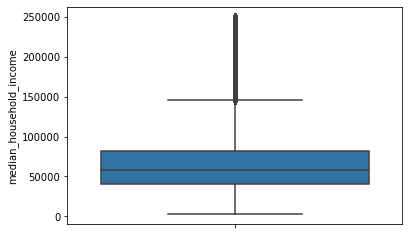

In [50]:
sns.boxplot(data = df_6,  y = 'median_household_income')

In [51]:
df_6['median_household_income'].quantile([0.25,0.5,0.75])

0.25    40192.0
0.50    57892.0
0.75    82500.0
Name: median_household_income, dtype: float64

In [52]:
income_bins = [0, 40000, 58000, 83000, 100000,500000]
income_names = ['Low','Mid-Low','Mid-High','High',"Extreme-High"]

df_6["Income Bins"] = pd.cut(df_6["median_household_income"],income_bins,labels=income_names)

<AxesSubplot:xlabel='Income Bins', ylabel='median_household_income'>

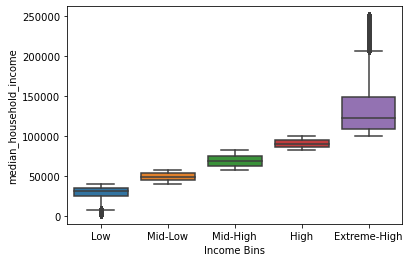

In [53]:
sns.boxplot(data = df_6,  x = 'Income Bins', y = 'median_household_income')

## CHICAGO CITY

In [54]:
#df_Chic =  df_6[df_6["incorporated_place"] == "Chicago city"].copy()



In [55]:
#fig = plt.figure(figsize = (20,20))


#ax = sns.scatterplot(data = df_Chic, x = 'lon', y = 'lat', hue = 'Download_Speed_Cats', size ='median_household_income', sizes = (40,400))

In [56]:

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from scipy.ndimage import gaussian_filter


# def myplot(x, y, s, bins=1000):
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
#     heatmap = gaussian_filter(heatmap, sigma=s)

#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     return heatmap.T, extent


# fig, ax = plt.subplots()



# img, extent = myplot(df_6["lon"],df_6["lat"], 100)
# ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)


# plt.show()

## RACE PERCETAGE OF NON-WHITE

In [57]:
race_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 1.1]
race_percs = ['10 percent','20 percent','30 percent','40 percent','50 percent','60 percent','70 percent','80 percent','90 percent','100 percent']

df_6["Non-White Percentage"] = pd.cut(df_6["race_perc_non_white"],race_bins,labels=race_percs)

In [58]:
#df_6.to_csv('internet_offer_2.csv', index=False) 

<AxesSubplot:xlabel='speed_down'>

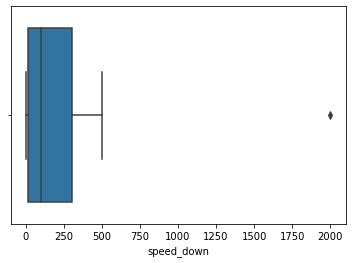

In [59]:
sns.boxplot(data = df_6, x = 'speed_down')

In [60]:
df_6 = df_6.drop(df_6[df_6["speed_down"] > 750].index)

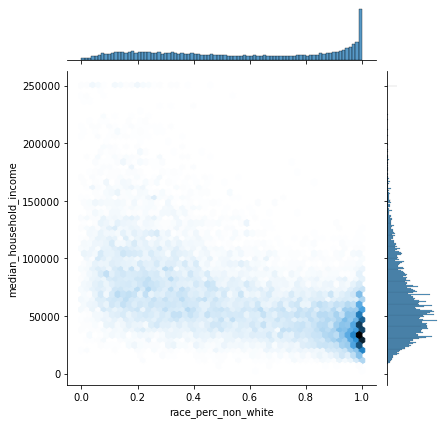

In [61]:
sns.jointplot(data = df_6, x = 'race_perc_non_white', y = 'median_household_income', kind = 'hex')

In [62]:
df_6.shape[0]

1185984

In [63]:
c = df_6.groupby(["Download_Speed_Cats","Non-White Percentage"])['speed_down'].count()
c

Download_Speed_Cats  Non-White Percentage
Slow                 10 percent               24199
                     20 percent               45380
                     30 percent               44476
                     40 percent               39721
                     50 percent               30407
                     60 percent               26223
                     70 percent               25442
                     80 percent               24957
                     90 percent               31773
                     100 percent              72695
Moderate             10 percent               21853
                     20 percent               41722
                     30 percent               40853
                     40 percent               38676
                     50 percent               30764
                     60 percent               25442
                     70 percent               23611
                     80 percent               26650
                     9

In [64]:
#c / c.groupby(level = 0).sum()

In [65]:
#df_6["Percentage_of_Net_offers"] =  c / c.groupby(level = 0).sum()

In [66]:
#we groupby the two catagories and just obtain the count specific to a net Speed and Non_white perc 

df_6["Total Offers by Speed"] =  df_6.groupby(["Download_Speed_Cats","Non-White Percentage"])['speed_down'].transform('count')

In [67]:
#then we divide the total offers by speed with the Total offers, the total offers is repeating for each row as we did transform. So just take the max or unique etc

df_6["Percentage_of_Net_offers"] = df_6["Total Offers by Speed"]/df_6.groupby("Download_Speed_Cats")['Total Offers by Speed'].transform('max')*100

In [69]:
#df_6["speed_down"].count()/ df_6.groupby(["Download Speed Catagories","Non-White Percentage"]).transform('count')

In [70]:
df_6.dtypes

address_full                     object
incorporated_place               object
major_city                       object
state                            object
lat                             float64
lon                             float64
block_group                     float64
collection_datetime               int64
provider                         object
speed_down                      float64
speed_up                        float64
speed_unit                       object
price                           float64
technology                       object
package                          object
fastest_speed_down              float64
fastest_speed_price             float64
fn                               object
race_perc_non_white             float64
income_lmi                       object
ppl_per_sq_mile                 float64
n_providers                     float64
income_dollars_below_median     float64
internet_perc_broadband         float64
median_household_income         float64


In [71]:
df_6["provider"].unique()

array(['AT&T', 'CenturyLink', 'EarthLink', 'Verizon'], dtype=object)

In [72]:
slow_df = df_6[df_6["Download_Speed_Cats"] == "Slow"]
moderate_df = df_6[df_6["Download_Speed_Cats"] == "Moderate"]

In [73]:
df_6.groupby(["Download_Speed_Cats","Non-White Percentage"])["Percentage_of_Net_offers"].mean().reset_index()

,Download_Speed_Cats,Non-White Percentage,Percentage_of_Net_offers
0,Slow,10 percent,33.288397
1,Slow,20 percent,62.425201
2,Slow,30 percent,61.181649
3,Slow,40 percent,54.640622
4,Slow,50 percent,41.828186
5,Slow,60 percent,36.072632
6,Slow,70 percent,34.998280
7,Slow,80 percent,34.331109
8,Slow,90 percent,43.707270
9,Slow,100 percent,100.000000


In [74]:
df_redline = df_6.groupby(["Non-White Percentage","Download_Speed_Cats"])["Percentage_of_Net_offers"].median().reset_index()

In [75]:
df_redline.head()

,Non-White Percentage,Download_Speed_Cats,Percentage_of_Net_offers
0,10 percent,Slow,33.288397
1,10 percent,Moderate,20.901361
2,10 percent,Fast,46.188152
3,10 percent,Blazing,17.853362
4,20 percent,Slow,62.425201


In [76]:
x = df_redline["Download_Speed_Cats"].unique()
x

['Slow', 'Moderate', 'Fast', 'Blazing']
Categories (4, object): ['Slow' < 'Moderate' < 'Fast' < 'Blazing']

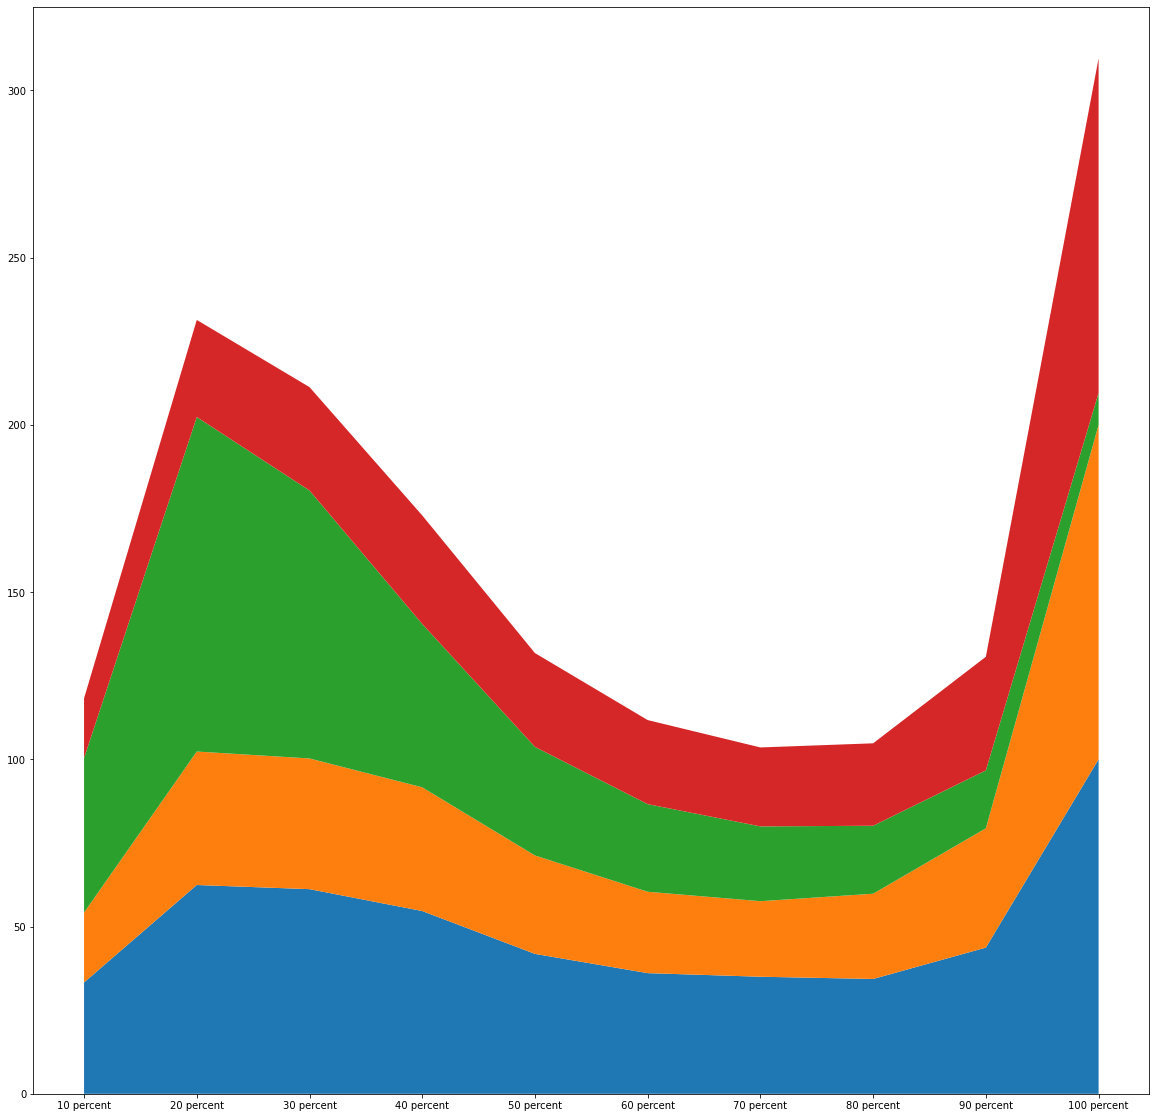

In [77]:
x = ['10 percent', '20 percent', '30 percent', '40 percent', '50 percent', '60 percent', '70 percent', '80 percent', '90 percent', '100 percent']

fig = plt.figure(figsize = (20,20))

df_slow = df_redline[df_redline["Download_Speed_Cats"] == 'Slow']

df_mod = df_redline[df_redline["Download_Speed_Cats"] == 'Moderate']

df_fast = df_redline[df_redline["Download_Speed_Cats"] == 'Fast']

df_blaz = df_redline[df_redline["Download_Speed_Cats"] == 'Blazing']

plt.stackplot(df_slow["Non-White Percentage"] ,df_slow["Percentage_of_Net_offers"],df_mod["Percentage_of_Net_offers"],df_fast["Percentage_of_Net_offers"],df_blaz["Percentage_of_Net_offers"],labels = ['Slow', 'Moderate', 'Fast', 'Blazing'])




In [78]:
df_6.columns

Index(['address_full', 'incorporated_place', 'major_city', 'state', 'lat',
       'lon', 'block_group', 'collection_datetime', 'provider', 'speed_down',
       'speed_up', 'speed_unit', 'price', 'technology', 'package',
       'fastest_speed_down', 'fastest_speed_price', 'fn',
       'race_perc_non_white', 'income_lmi', 'ppl_per_sq_mile', 'n_providers',
       'income_dollars_below_median', 'internet_perc_broadband',
       'median_household_income', 'Broadband_percentage_pop',
       'Download_Speed_Cats', 'Income Bins', 'Non-White Percentage',
       'Total Offers by Speed', 'Percentage_of_Net_offers'],
      dtype='object')

In [79]:
df_6.drop(columns = ['major_city'], inplace = True)

In [80]:
renamed_cols = {"address_full":"Address", 'incorporated_place' : "City", 'speed_down': 'Download Speed',
       'median_household_income':"Median Household Income" }

In [81]:
df_6["% of White Demographic"] = df_6["race_perc_non_white"].apply(lambda x : (1-x)*100)

In [82]:
df_6["Country"] = "USA"

In [90]:
df_6.rename(columns = renamed_cols, inplace= True)

In [91]:
df_6.head()

,Address,City,state,lat,lon,block_group,collection_datetime,provider,Download Speed,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,Median Household Income,Broadband_percentage_pop,Download_Speed_Cats,Income Bins,Non-White Percentage,Total Offers by Speed,Percentage_of_Net_offers,% of White Demographic,Country
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Blazing,Low,50 percent,29127.0,28.033147,52.494062,USA


In [94]:
white_race_bins = [0, 10, 20, 30, 40, 50,60,70, 80, 90, 110]
white_race_percs = ['10 percent','20 percent','30 percent','40 percent','50 percent','60 percent','70 percent','80 percent','90 percent','100 percent']

df_6["% of White Demographic Group"] = pd.cut(df_6["% of White Demographic"],white_race_bins,labels=white_race_percs)

In [95]:
df_6.head()

,Address,City,state,lat,lon,block_group,collection_datetime,provider,Download Speed,speed_up,speed_unit,price,technology,package,fastest_speed_down,fastest_speed_price,fn,race_perc_non_white,income_lmi,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,Median Household Income,Broadband_percentage_pop,Download_Speed_Cats,Income Bins,Non-White Percentage,Total Offers by Speed,Percentage_of_Net_offers,% of White Demographic,Country,% of White Demographic Group
0,"2406 Country Club Ave NW, Huntsville AL 35816",Huntsville city,AL,34.745179,-86.606806,1.089001e+10,1650310200,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA,60 percent
1,"1902 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,AL,34.747563,-86.607140,1.089001e+10,1650310229,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA,60 percent
2,"2312 Cardinal Ave NW, Huntsville AL 35816",Huntsville city,AL,34.746504,-86.605884,1.089001e+10,1650310203,AT&T,0.768,0.384,Mbps,55.0,Not Fiber,Internet Basic 768kbps,0.768,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA,60 percent
3,"1903 Oglesby Dr NW, Huntsville AL 35816",Huntsville city,AL,34.747759,-86.607675,1.089001e+10,1650310195,AT&T,5.000,1.000,Mbps,55.0,Not Fiber,Internet Basic 5,5.000,55.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Slow,Low,50 percent,30407.0,41.828186,52.494062,USA,60 percent
4,"1905 Canterbury Cir NW, Huntsville AL 35816",Huntsville city,AL,34.748585,-86.605223,1.089001e+10,1650310196,AT&T,300.000,300.000,Mbps,55.0,Fiber,AT&T FIBER—INTERNET 300,5000.000,180.0,../data/intermediary/isp/att/huntsville/010890...,0.475059,0.381744,512.09007,4.0,35091.0,0.527881,21667.0,60 percent,Blazing,Low,50 percent,29127.0,28.033147,52.494062,USA,60 percent


In [97]:
df_6.to_csv('internet_offer_2.csv', index=False) 

In [93]:
df_6["Download_Speed_Cats"].value_counts()

Moderate    392338
Slow        366098
Blazing     360490
Fast         67058
Name: Download_Speed_Cats, dtype: int64